### Количество вопросов по каналам
### Количество ответов пользователя по каналам
### Стата по лайкам за год:
- каких лайков сколько  
- самые залайканные посты в открытых каналах (включая максимум :parrot: , :pepe_sad: , :catshake: , :ods: , ...)  

### Открытые вопросы:  
Несколько ответов одного пользователя на одни и тот же вопрос

Реакции хорошие - '@username спасибо', :heavy_plus_sign: ....
Реакции плохие - 

Морфологический анализ 

https://tech.yandex.ru/mystem/

There is a sub-field of natural language processing called <a href="http://en.wikipedia.org/wiki/Sentiment_analysis" rel="noreferrer">sentiment analysis</a> that deals specifically with this problem domain. 
There is a fair amount of commercial work done in the area because consumer products are so heavily reviewed in online user forums (ugc or user-generated-content). 
There is also a prototype platform for text analytics called <a href="http://gate.ac.uk/" rel="noreferrer">GATE</a> from the university of sheffield, 
and a python project called <a href="http://sourceforge.net/projects/nltk/" rel="noreferrer">nltk</a>. 
Both are considered flexible, but not very high performance. One or the other might be good for working out your own ideas.

Only you have to do this train the model to your context , add featured vector and rule based tune up. 
In my case I got some (61% accuracy). So We move into <a href="http://nlp.stanford.edu/software/corenlp.shtml" rel="nofollow">stanford core nlp</a> ( they trained their model for movie reviews) 
and we used their training set and add our training set. we could achieved 80-90% accuracy.

оформить все html + bootstrap 
в идеале запихнуть все в контейнер

### Импорт библиотек

In [1]:
import glob
import pandas as pd
import json
from pandas.io.json import json_normalize

from datetime import datetime

import os

import re

import pymorphy2
morph = pymorphy2.MorphAnalyzer()

%matplotlib inline
import matplotlib.pyplot as plt



In [76]:
print ('Размер файла', round(os.path.getsize('2018_ods_raw.csv')/1000/1000.0,2), 'мегабайт')

Размер файла 28.36 мегабайт


In [3]:
df = pd.read_csv('2018_ods_raw.csv', sep='|', encoding='utf-8', dtype=str)

In [4]:
# tp = pd.read_csv('2018_ods_raw.csv', sep='|', encoding='utf-8', dtype=str, iterator=True, chunksize=1000)
# print (tp)
# #<pandas.io.parsers.TextFileReader object at 0x00000000150E0048>
# df = pd.concat(tp, ignore_index=True)

In [5]:
# df.info() 

In [6]:
len(df)

55930

In [7]:
# Почему в dataframe 55к а в csv 80 !?!??!?!
!cat 2018_ods_raw.csv | wc -l

80668


In [8]:
# Все столбцы таблицы
# list(json_df)

In [9]:
df.tail()

,FILE,client_msg_id,parent_user_id,text,thread_ts,ts,type,user,edited.ts,edited.user,...,root.display_as_bot,root.files,root.upload,unfurl_links,unfurl_media,purpose,x_files,icons.image_36,icons.image_72,bot_link
55925,/opt/app/data/shared/latest_dump/medicine/2018...,f543e98c-70a3-4aa4-81cb-a1eb14601edc,U6KGEPFH6,В этой статье приведен бенчмарк по данным соре...,1542663029.019600,1542664078.019900,message,U6KGEPFH6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55926,/opt/app/data/shared/latest_dump/deephack/2018...,2135c387-313a-4c1e-98ab-6179fe232fea,NaN,Новая версия #DeepPavlov 0.1.0 открытой библио...,1543408540.003300,1543408540.003300,message,U6DFEDSSK,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55927,/opt/app/data/shared/latest_dump/deephack/2018...,355d5612-bf94-441c-970a-ed0123ae890f,U4X6DG29F,"нет, не будет.",1534447239.000100,1542186210.001400,message,UB12YJENN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55928,/opt/app/data/shared/latest_dump/deephack/2018...,15956d02-3015-4383-bea3-3515069332e0,U4X6DG29F,Ну ок,1534447239.000100,1542189208.001600,message,U4X6DG29F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55929,/opt/app/data/shared/latest_dump/deephack/2018...,3f5a41fb-26ff-4416-bdee-1972d8b792a0,U4X6DG29F,<@UB12YJENN>,1534447239.000100,1542114409.001200,message,U4X6DG29F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Добавляю категорию для сообщений
df['cat'] = df['FILE']
df['cat'] = df['cat'].str.replace('/opt/app/data/shared/latest_dump/', '')
df['cat'] = df['cat'].str.replace('\/.*','').str.strip()

In [11]:
df['thread_ts'] = pd.to_datetime(df['thread_ts'], unit='s')
df['ts'] = pd.to_datetime(df['ts'], unit='s')

# Информация по сообщениям
##### Количество сообщений: 55930
##### Количество родительских сообщений: 2801
##### Количество не пустых родительских сообщений: 2750
##### Родительское сообщений набравшее больше всего ответо (246 шт.) https://opendatascience.slack.com/archives/C91N8TL83/p1542103865495600

In [12]:
# Количество ответов на родительские сообщения 
df.groupby(['thread_ts'])['thread_ts'].agg('count').sort_values(ascending=False).head()

thread_ts
2018-11-13 10:11:05.495599985    246
2018-11-14 09:55:01.799499989    225
2018-11-06 09:45:51.531300067    181
2018-11-14 09:53:54.481800079    155
2018-11-16 08:59:45.085799932    154
Name: thread_ts, dtype: int64

In [13]:
# https://opendatascience.slack.com/archives/C91N8TL83/p1542103865495600
# df.loc[(df['thread_ts'] == '2018-11-13 10:11:05.495599985') & (df['thread_ts'] == df['ts'])]
# https://opendatascience.slack.com/archives/C91N8TL83/p1542103865495600
# df.loc[(df['thread_ts'] == '2018-11-14 09:55:01.799499989') & (df['thread_ts'] == df['ts'])]

In [77]:
 df[df.thread_ts.isnull()]

,FILE,client_msg_id,parent_user_id,text,thread_ts,ts,type,user,edited.ts,edited.user,...,root.files,root.upload,unfurl_links,unfurl_media,purpose,x_files,icons.image_36,icons.image_72,bot_link,cat
10,/opt/app/data/shared/latest_dump/_meetings_fi/...,411ce3fe-412a-498a-b8f3-0df26484bd86,NaN,"Три лекции в Аалто. Две - сегодня и завтра, пр...",NaT,2018-11-14 09:56:54.006999969,message,U625V2J3G,1542189525.000000,U625V2J3G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_meetings_fi
11,/opt/app/data/shared/latest_dump/_meetings_fi/...,NaN,NaN,<@UAKCBE2DA> has joined the channel,NaT,2018-11-08 09:23:20.000299931,message,UAKCBE2DA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_meetings_fi
12,/opt/app/data/shared/latest_dump/_meetings_fi/...,NaN,NaN,<@UCKEMMP3N> has joined the channel,NaT,2018-11-09 06:11:17.000499964,message,UCKEMMP3N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_meetings_fi
71,/opt/app/data/shared/latest_dump/_meetings_de/...,2281a853-60f0-4aa4-a4cb-6c8e2ce4991a,NaN,"пятничное: наверное многие резюме разгребают, ...",NaT,2018-11-30 08:21:18.001699924,message,U30A6KZLH,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_meetings_de
73,/opt/app/data/shared/latest_dump/_meetings_de/...,3180c711-82f2-4f1a-a152-8e024f9284da,NaN,слишком много буков,NaT,2018-11-30 08:52:11.002599955,message,U0DA4J82H,1543567934.000000,U0DA4J82H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_meetings_de
102,/opt/app/data/shared/latest_dump/_meetings_de/...,18e987ee-37ad-49f4-aaba-cf3d9f828b9b,NaN,Всем привет! Буду на пару дней в Берлине 4 дек...,NaT,2018-11-23 15:09:15.118999958,message,U48B3EN87,1542985945.000000,U48B3EN87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_meetings_de
130,/opt/app/data/shared/latest_dump/_meetings_de/...,NaN,NaN,*This poll is closed.*\n<@UAB352F71> has a pol...,NaT,2018-11-26 10:00:21.124500036,message,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_meetings_de
132,/opt/app/data/shared/latest_dump/_meetings_de/...,d996f7d7-e54b-479a-bf09-9d2823716ddd,NaN,"Если что, я в белом свитере с горлом. Сижу, гд...",NaT,2018-11-27 07:53:32.126499891,message,U27SUBTB9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_meetings_de
144,/opt/app/data/shared/latest_dump/_meetings_de/...,NaN,NaN,*This poll is closed.*\n<@UAB352F71> has a pol...,NaT,2018-11-12 10:00:22.025399923,message,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_meetings_de
159,/opt/app/data/shared/latest_dump/_meetings_de/...,B5ECF6D7-8B4A-46EF-8AE1-3210C97106DD,NaN,"Спасибо тем, кто это сделал)",NaT,2018-11-13 07:50:29.032599926,message,U645E5MFT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_meetings_de


In [14]:
# Родительские сообщения
# Возможно неправильно!?!?!!?
# df_parent = df[df.thread_ts == df.ts] # 2801
# df_parent = df[df.thread_ts.isnull()] # 26652 из них _random_b 3491 не нашел как связать с ответами
# df_parent = df[(df.thread_ts.isnull()) | (df.thread_ts == df.ts)]

df_parent = df.loc[(df['thread_ts'] == df['ts'])]

print ('Количество сообщений:', len(df))
print ('Количество родительских сообщений:', len(df_parent))
print ('Среднее количество ответов на родительское сообщение:', round(len(df)/len(df_parent),2))

Количество сообщений: 55930
Количество родительских сообщений: 2801
Среднее количество ответов на родительское сообщение: 19.97


In [15]:
# Самые популярные родительские сообщения по количеству ответов
# reply_count больше 200 почему то не бывает хотя есть сообщения с большим количеством коментариев

# df_parent[['thread_ts', 'cat', 'text', 'reply_count']].sort_values(['reply_count'], ascending=False).head()

In [16]:
# # df_a.groupby(['cat', 'user']).size().head(10)
# df_x = df.loc[df['thread_ts'].isin(df_parent['thread_ts'])]
# # df_x[['thread_ts', 'ts', 'cat', 'text', 'reply_count']]
# df_x.groupby(['thread_ts'])['thread_ts'].agg('count').sort_values(ascending=False).head()

In [17]:
# Удаляю сообщения с пустым text
# Почему такое бывает не разобрался
df_parent = df_parent.dropna(subset=['text'])
print ('Количество не пустых родительских сообщений:', len(df_parent))

Количество не пустых родительских сообщений: 2750


In [18]:
# Родительских сообщений по каналам
df_parent[['cat','thread_ts']]\
        .groupby(['cat'])['thread_ts'] \
        .count() \
        .reset_index(name='count') \
        .sort_values(['count'], ascending=False) \
        .head()

,cat,count
22,_random_b,239
23,_random_talks,200
63,mlcourse_ai_rus,172
62,mlcourse_ai,164
97,theory_and_practice,138


# Информация по заданным вопросам
##### Количество родительских сообщений с вопросами: 1840 из 2750


In [19]:
# Добавляю столбец текстом сообщений в номальной форме для того что бы потом искать сообщения с вопросами
df_parent['morph_text'] = df_parent['text']

In [20]:
def to_norm_form(data, column):
    full_words_list = []
    words_row_list = data[column].tolist()
    # Каждую строчку в переданном столбце
    for i in range(len(words_row_list)):
        # Получаю список слов
        words_list = re.sub("[^\w]", " ",  words_row_list[i]).split()
        # Каждое слово из строки
        norm_words_list = []
        for word in words_list:
            norm_word = morph.parse(word)[0].normal_form
            norm_words_list.append(norm_word)
        
        full_words_string = ' '.join(norm_words_list)
        full_words_list.append(full_words_string)
        
    return full_words_list

In [21]:
%%time
# Запонляю столбец morph_text текстом сообщений в номальной форме для того что бы потом искать сообщения с вопросами
df_parent['morph_text'] = to_norm_form(df_parent, 'morph_text')

CPU times: user 22.2 s, sys: 7.52 ms, total: 22.2 s
Wall time: 22.2 s


In [22]:
df_parent[['text', 'morph_text']].head()

,text,morph_text
2,Кто-нибудь заказывал вещи из амазона в Финлянд...,кто нибыть заказывать вещий из амазона в финля...
13,"Добрый вечер, я тут собирался подать на магист...",добрый вечер я тут собираться подать на магист...
15,"Ребят, где в Берлине можно посидеть поработать...",ребята где в берлин можно посидеть поработать ...
21,"Буду завтра в Мюнхене, уеду 19 вечером. Если е...",быть завтра в мюнхен уехать 19 вечером если ес...
31,А в Мюнхене никто не желает завтракать?,а в мюнхен никто не желать завтракать


In [23]:
# Добавляю признак что в тексте был знак вопроса
df_parent['found_question_mark'] = df_parent['text'].str.contains('\?')

In [24]:
df_parent[['text', 'morph_text', 'found_question_mark']].tail()

,text,morph_text,found_question_mark
55909,"Всем привет, подскажите пожалуйста программы д...",весь привет подсказать пожалуйста программа дл...,False
55918,"Есть ли датасеты по breast pathology, кроме эт...",есть ли датасет по breast pathology кроме это ...,True
55923,This message was deleted.,this message was deleted,False
55924,А что сейчас state-of-the-art в регистрации из...,а что сейчас state of the art в регистрация из...,True
55926,Новая версия #DeepPavlov 0.1.0 открытой библио...,новый версия deeppavlov 0 1 0 открытый библиот...,False


In [25]:
# morph.parse('зачем')[0].normal_form

In [26]:
# Количество родительских сообщений с вопросами
# QUESTION_WORD_LEMMAS = ("как", "как-то", "какой", "какой-то", "зачем", "почему", "когда", "кто", "где", "когда", "куда", "куда-то", "чот")
#QUESTION_WORDS = ('вопрос', 'обьяснит', 'подсказать', 'посоветовать', 'как') # Количество родительских сообщений с вопросами: 1828
QUESTION_WORDS = ('вопрос', 'обьяснит', 'подсказать', 'посоветовать', 'как', 'почему', 'зачем')

df_q = df_parent.loc[(df_parent['morph_text'].str.contains('|'.join(QUESTION_WORDS))) | (df_parent.found_question_mark == True)].reset_index()

In [27]:
print ('Количество родительских сообщений:', len(df_parent))
print ('Количество родительских сообщений с вопросами:', len(df_q))

Количество родительских сообщений: 2750
Количество родительских сообщений с вопросами: 1840


In [28]:
# Вопросов в родительских сообщениях по каналам
df_q[['cat','thread_ts']]\
        .groupby(['cat'])['thread_ts'] \
        .count() \
        .reset_index(name='count') \
        .sort_values(['count'], ascending=False) \
        .head()

,cat,count
54,mlcourse_ai_rus,151
86,theory_and_practice,131
19,_random_talks,120
48,lang_python,112
36,deep_learning,109


In [29]:
# Вопросов в родительских сообщениях по каналам

# df_q = df_q[df_q.cat != '_random_b'] # 5287
# df_q = df_q[df_q.cat != 'stack_overflow'] # 456

# df_q.groupby(['cat'])['thread_ts'].agg('count').sort_values(ascending=False).head()

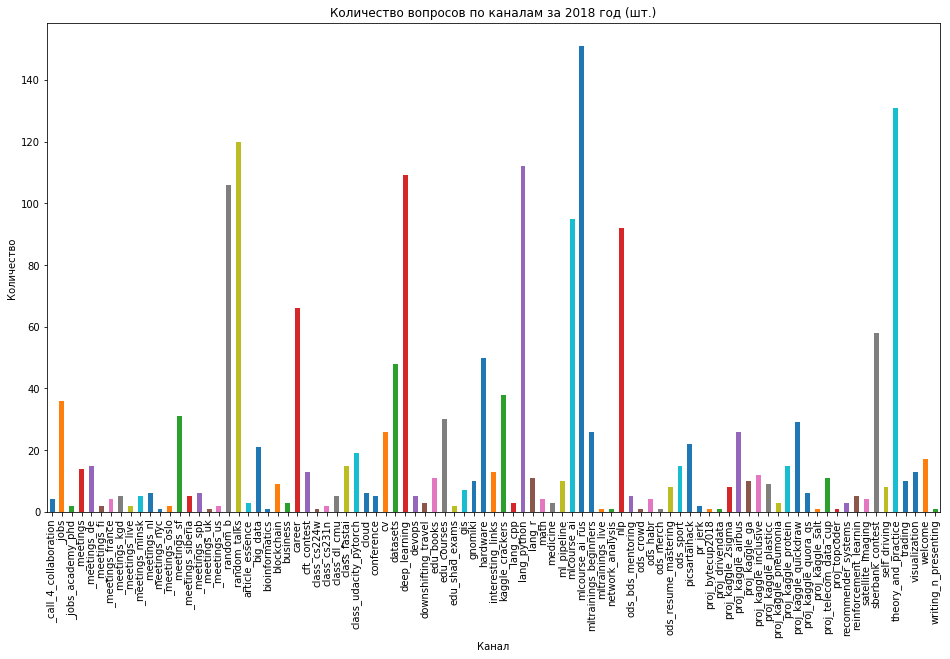

In [30]:
plt.rcParams["figure.figsize"] = (16, 9)

df_q.groupby(['cat'])['thread_ts'].agg('count').plot.bar()
plt.title('Количество вопросов по каналам за 2018 год (шт.)', loc='center')

plt.xlabel('Канал')
plt.ylabel('Количество')

# plt.savefig('2018-ods-questions.svg', format='svg')
plt.savefig('2018-ods-questions.png', bbox_inches = 'tight', dpi=600)
# I used 1200 dpi because a lot of scientific journals require images in 1200 / 600 / 300 dpi depending on what the image is of

# Информация по ответам на вопросы

In [31]:
# # reply_count показывает странные цифры

# # Ответов на сообщения вопросы по полю reply_count
# # df_q[['cat', 'thread_ts', 'text', 'morph_text', 'reply_count']].sort_values('reply_count', ascending=False).head()
# df_q[['cat', 'thread_ts', 'reply_count']].sort_values('reply_count', ascending=False).head()

In [32]:
# df_q.loc[(df_q['thread_ts'] == '2018-11-01 18:36:36.419199944')]

In [33]:
# df.loc[df['thread_ts'].isin(df_q['thread_ts'])].tail()

In [47]:
# Ответов по вхождению сообщений пользователей в сообщения вопросы

# наверно будет хорошей идеей отфильтровать из ответов на вопросы пользователей которые задали родительский вопрос

# df_a = df.loc[df['thread_ts'].isin(df_q['thread_ts'])]
# df_a[['cat','thread_ts', 'user']]\
#                         .groupby(['cat', 'thread_ts', 'user'])['thread_ts'] \
#                         .count() \
#                         .reset_index(name='count') \
#                         .sort_values(['count'], ascending=False) \
#                         .head()

In [48]:
len(df_a)

3171

In [49]:
# df_q.loc[(df_q['thread_ts'] == '2018-11-16 08:59:45.085799932')]

In [50]:
# Ответов по вхождению сообщений пользователей в сообщения вопросы
# наверно будет хорошей идеей отфильтровать из ответов на вопросы пользователей которые задали родительский вопрос

df_a = df.loc[df['thread_ts'].isin(df_q['thread_ts']) & ~df['user'].isin(df_q['user'])]

df_a[['cat', 'user']]\
    .groupby(['cat', 'user'])['user'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['count'], ascending=False) \
    .head()

,cat,user,count
725,mlcourse_ai_rus,UA6FTKAE4,55
615,lang_python,UDSC91AH1,54
364,deep_learning,U0H7VBQQ1,53
1020,theory_and_practice,UAK6N0GVD,50
753,mlcourse_ai_rus,UDDLTB8FN,50


In [51]:
len(df_a)

3171

In [52]:
df_q.tail()

,index,FILE,client_msg_id,parent_user_id,text,thread_ts,ts,type,user,edited.ts,...,unfurl_links,unfurl_media,purpose,x_files,icons.image_36,icons.image_72,bot_link,cat,morph_text,found_question_mark
1835,55875,/opt/app/data/shared/latest_dump/theory_and_pr...,NaN,NaN,"Привет, может кто-нибудь сможет дать дельный с...",2018-11-20 02:57:51.890799999,2018-11-20 02:57:51.890799999,message,UCJRCGX5H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,theory_and_practice,привет мочь кто нибыть смочь дать дельный сове...,True
1836,55891,/opt/app/data/shared/latest_dump/theory_and_pr...,fa2cf299-e233-4061-98da-fba630de82ac,NaN,"Необходимо сравнивать, что распределение в дву...",2018-11-20 07:31:51.907999992,2018-11-20 07:31:51.907999992,message,U9V48C738,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,theory_and_practice,необходимый сравнивать что распределение в два...,True
1837,55909,/opt/app/data/shared/latest_dump/medicine/2018...,0842b5d0-9f41-45c2-ac70-468994da7ac7,NaN,"Всем привет, подскажите пожалуйста программы д...",2018-11-30 08:54:34.000200033,2018-11-30 08:54:34.000200033,message,UBLMEUSG6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medicine,весь привет подсказать пожалуйста программа дл...,False
1838,55918,/opt/app/data/shared/latest_dump/medicine/2018...,f913acf2-44c3-40fd-adae-151e62cd2bc1,NaN,"Есть ли датасеты по breast pathology, кроме эт...",2018-11-15 07:50:41.008699894,2018-11-15 07:50:41.008699894,message,U6HFLJK7H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medicine,есть ли датасет по breast pathology кроме это ...,True
1839,55924,/opt/app/data/shared/latest_dump/medicine/2018...,8a98aa7d-6f2c-408e-a449-b32d56a1b0f3,NaN,А что сейчас state-of-the-art в регистрации из...,2018-11-19 21:30:29.019599915,2018-11-19 21:30:29.019599915,message,U6KGEPFH6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medicine,а что сейчас state of the art в регистрация из...,True


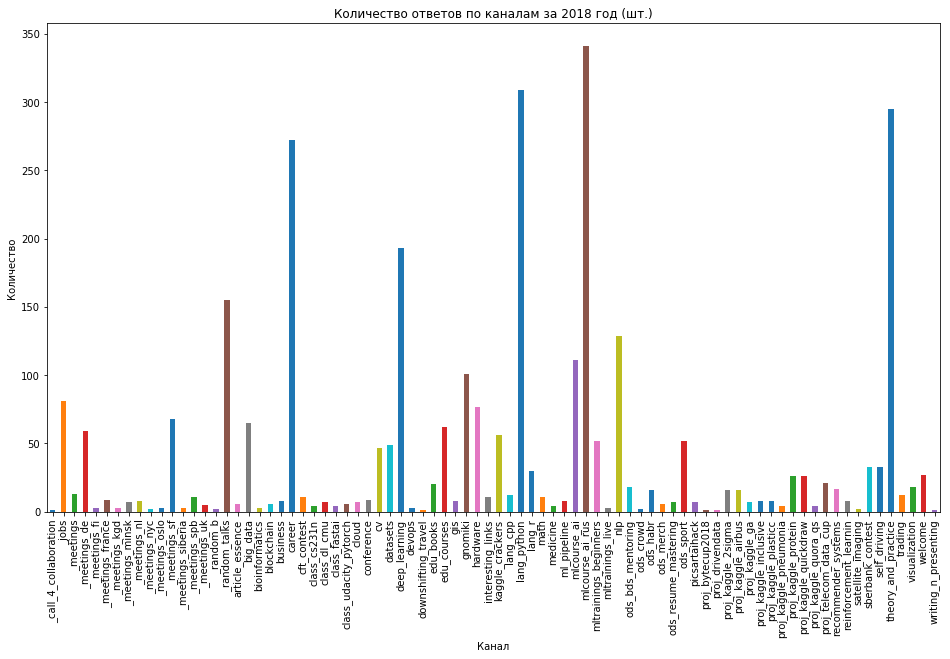

In [75]:
plt.rcParams["figure.figsize"] = (16, 9)

df_a.groupby(['cat'])['cat'].agg('count').plot.bar()
plt.title('Количество ответов по каналам за 2018 год (шт.)', loc='center')

plt.xlabel('Канал')
plt.ylabel('Количество')

# plt.savefig('2018-ods-questions.svg', format='svg')
plt.savefig('2018-ods-questions.png', bbox_inches = 'tight', dpi=600)
# I used 1200 dpi because a lot of scientific journals require images in 1200 / 600 / 300 dpi depending on what the image is of

In [63]:
users_list = json.loads(open('/opt/app/data/shared/latest_dump/users.json').read())
users_df = json_normalize(users_list)

# users_df.info()
# users_df[['id', 'name']].head()

In [66]:
df_a = pd.merge(df_a, users_df,  how='left', left_on=['user'], right_on = ['id'])

In [69]:
# Топ пользователей по ответам на вопросы
df_a.groupby(['user', 'name'])['user'].agg('count').reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,user,name,count
28,U0H7VBQQ1,alex.ozerin,153
584,UDSC91AH1,crazyelf,130
557,UD8LQR0BU,lebedev.yurii,89
261,U6N0VSTBL,mihaild,71
442,UAK6N0GVD,sazonov.andrey,68
459,UB83M2QE7,remper,60
424,UA6FTKAE4,aidarsiraev11,58
70,U1QN13664,oavdeev,55
126,U3NTG7CCS,bes,54
566,UDDLTB8FN,lazarev.georgy,50


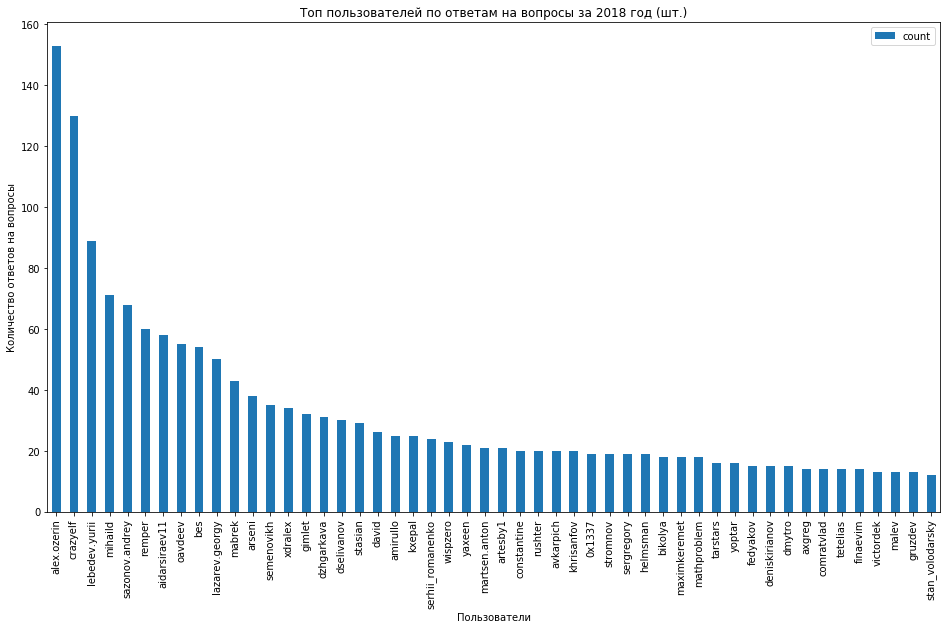

In [74]:
plt.rcParams["figure.figsize"] = (16, 9)

df_user_replies = df_a.groupby(['user', 'name'])['user'].agg('count').reset_index(name='count').sort_values(['count'], ascending=False).head(50)
df_user_replies.set_index('name').plot.bar()

plt.title('Топ пользователей по ответам на вопросы за 2018 год (шт.)', loc='center')
plt.xlabel('Пользователи')
plt.ylabel('Количество ответов на вопросы')

# plt.savefig('2018-ods-questions.svg', format='svg')
plt.savefig('2018-ods-user-answers.png', bbox_inches = 'tight', dpi=600)
# I used 1200 dpi because a lot of scientific journals require images in 1200 / 600 / 300 dpi depending on what the image is of